In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    plt.show()

In [11]:
df = pd.read_csv('ze_final.csv')

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['event'].value_counts(normalize=True))

1    0.589679
0    0.410321
Name: event, dtype: float64


**Para alunos de cursos noturnos: cidade de origem impacta a evasão?**

- Parece não haver distinção quanto à cidade de origem para discentes de cursos noturnos
- Número médio de rerovações é maior para discentes cuja cidade de origem é igual à cidade do campus. Por quê?

In [18]:
idx = (df['time'] == df.groupby('matricula')['time'].transform('max')) & (df['turno'] == 'Noturno')

pd.crosstab(df[idx].event, df[idx].is_outra_cidade, normalize='columns')

is_outra_cidade,0,1
event,,
0,0.460931,0.437173
1,0.539069,0.562827


In [30]:

idx = df.time > 1

students = df[idx].groupby('matricula').agg({'n_rep' : 'mean', 'n_repf': 'mean', 'n_tra' : 'mean', 'n_apr' : 'mean'}).reset_index()

idx = df['time'] == df.groupby('matricula')['time'].transform('max')

foo = pd.merge(df.loc[idx, ['matricula', 'turno', 'event', 'is_outra_cidade']], students, on='matricula')

idx= foo.turno == 'Noturno'

foo[idx].groupby('is_outra_cidade').agg({'n_repf' : 'mean', 'n_rep' : 'mean', 'n_tra' : 'mean'})

,n_repf,n_rep,n_tra
is_outra_cidade,,,
0,0.362844,0.757598,0.274952
1,0.353353,0.520566,0.249714


**Taxa de evasão é maior para estudantes cuja origem difere da cidade do campus?**

- Cidade de origem parece não influenciar evasão 

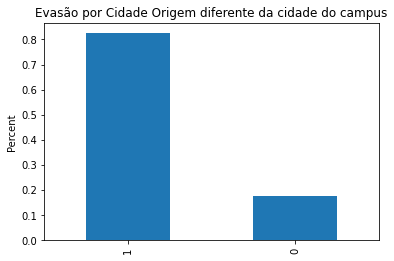

In [6]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_outra_cidade'].value_counts(normalize=True).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Cidade Origem diferente da cidade do campus')
plt.show()

1    0.815239
0    0.184761
Name: is_outra_cidade, dtype: float64
   is_outra_cidade  event    percent
0                0      1  56.135556
1                0      0  43.864444
2                1      1  59.609786
3                1      0  40.390214


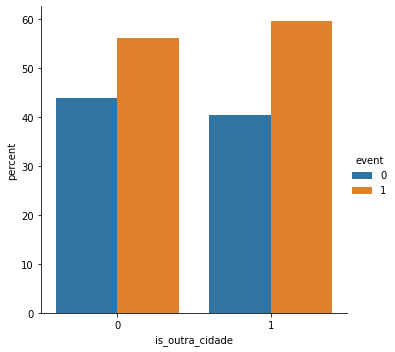

In [5]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_outra_cidade'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_outra_cidade', 'event')

**Taxa de evasão é maior para ingressantes no 1o semestre?**

- Evasão é maior entre ingressantes no 2o semestre

1    0.579176
2    0.420824
Name: semestreIngresso, dtype: float64


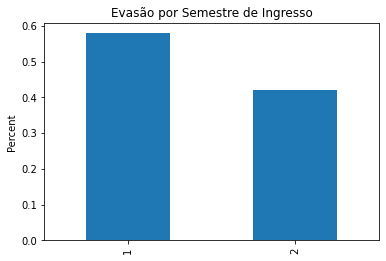

In [20]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')
counts = df.loc[idx, 'semestreIngresso'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre de Ingresso')
plt.show()


1    0.579176
2    0.420824
Name: semestreIngresso, dtype: float64
   semestreIngresso  event    percent
0                 1      1  53.731473
1                 1      0  46.268527
2                 2      1  66.174706
3                 2      0  33.825294


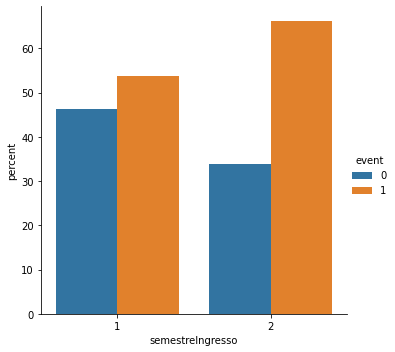

In [7]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreIngresso'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreIngresso', 'event')

**Taxa de evasão no 2o semestre letivo é maior?**

- Evasão é maior no 2o semestre letivo. Pode haver efeito SISU.

2    0.557544
1    0.442456
Name: semestreLetivo, dtype: float64


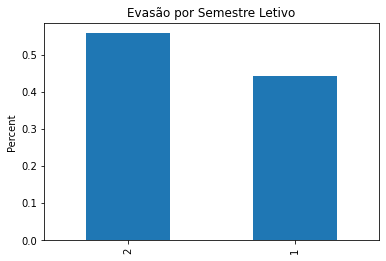

In [22]:
idx = df['event'] == 1

counts = df.loc[idx, 'semestreLetivo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Semestre Letivo')
plt.show()


2    0.502676
1    0.497324
Name: semestreLetivo, dtype: float64
   semestreLetivo  event    percent
0               1      1  52.462179
1               1      0  47.537821
2               2      1  65.404319
3               2      0  34.595681


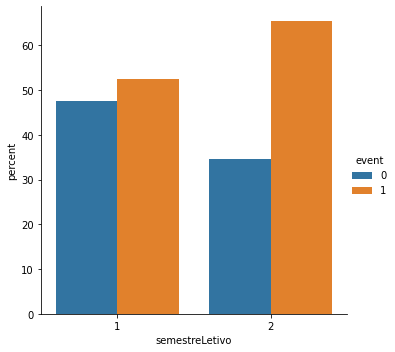

In [9]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['semestreLetivo'].value_counts(normalize=True))

plot_percentage(df[idx], 'semestreLetivo', 'event')

**Há interação entre evasão e o sexo do estudante?**

- A evasão é maior entre os homens

0    0.523634
1    0.476366
Name: sexo, dtype: float64


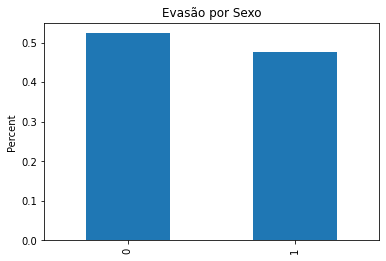

In [24]:
idx = df['event'] == 1

counts = df.loc[idx, 'sexo'].value_counts(normalize=True)
print(counts)

ax = counts.plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão por Sexo')
plt.show()

0    0.552767
1    0.447233
Name: sexo, dtype: float64
   sexo  event    percent
0     0      1  55.860053
1     0      0  44.139947
2     1      1  62.809078
3     1      0  37.190922


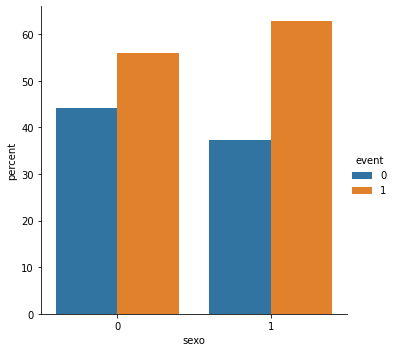

In [25]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['sexo'].value_counts(normalize=True))

plot_percentage(df[idx], 'sexo', 'event')

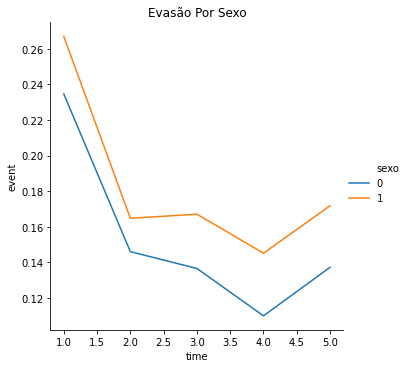

In [93]:
data = df.groupby(['time','sexo']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='sexo',  kind="line")    
ax.set(title='Evasão Por Sexo')    

**Há diferenças entre cotistas e ampla concorrência?**

- Parece não haver diferença entre cotistas e ampla concorrência

0    0.518279
1    0.481721
Name: is_cotista, dtype: float64
   is_cotista  event    percent
0           0      1  60.083788
1           0      0  39.916212
2           1      1  57.767296
3           1      0  42.232704


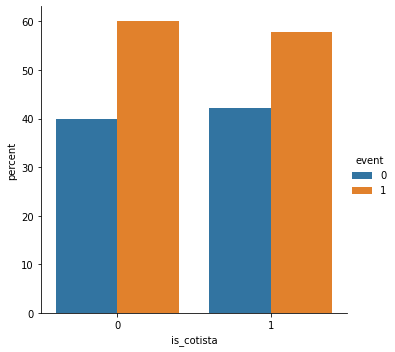

In [26]:
idx = df['time'] == df.groupby('matricula')['time'].transform('max')

print(df[idx]['is_cotista'].value_counts(normalize=True))

plot_percentage(df[idx], 'is_cotista', 'event')

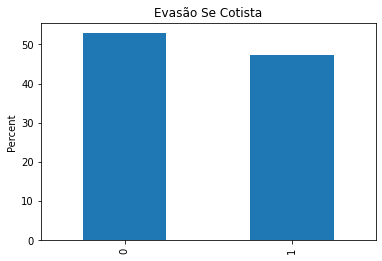

In [16]:
idx = df['event'] == 1

ax = df.loc[idx, 'is_cotista'].value_counts(normalize=True).mul(100).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Se Cotista')
plt.show()


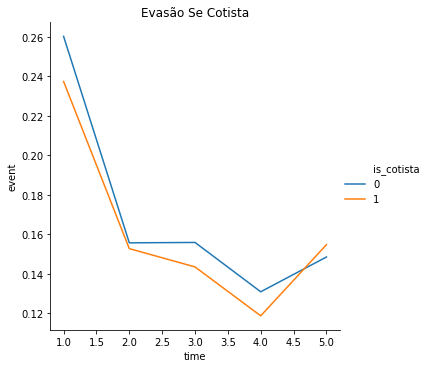

In [95]:
data = df.groupby(['time','is_cotista']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='is_cotista',  kind="line")    
ax.set(title='Evasão Se Cotista')    

**Taxa de evasão tende a decrescer com o tempo**

[Text(0.5, 1.0, 'Evasão Geral')]

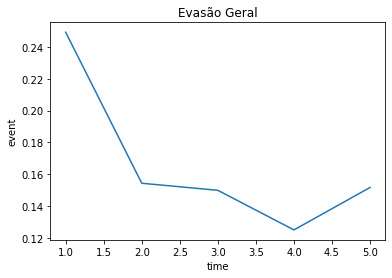

In [96]:
data = df.groupby('time').agg({'event':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='event', data=data)    
ax.set(title='Evasão Geral')

**Taxa de evasão tende a decrescer com o tempo em cada centro de ensino**

Observações:
- Taxas de evasão em CFP e CECULT são mais altas no primeiro semestre comparadas aos outros centros
- Taxa de evasão em CECULT cresce até o terceiro semestre

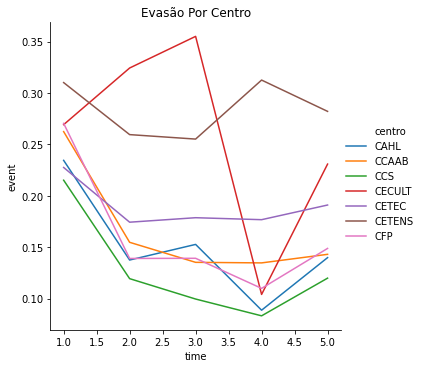

In [97]:
data = df.groupby(['time','centro']).agg({'event':'mean'}).reset_index()
ax = sns.relplot(x='time', y='event', data=data, hue='centro',  kind="line")    
ax.set(title='Evasão Por Centro')    

**CETENS e CECULT possuem maiores taxas de evasão**

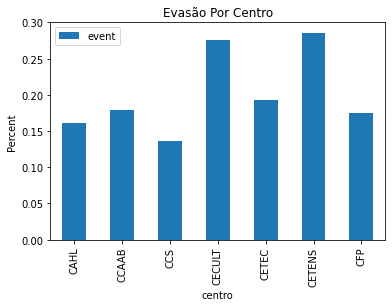

In [98]:
ax = df.groupby('centro').agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Centro')
plt.show()

**Evasão tende aumentar a partir de 25 anos**

Possível justicativa: necessidade de trabalhar

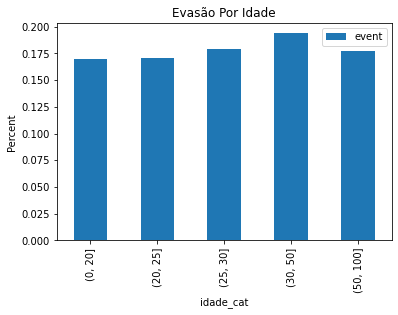

In [28]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

ax = df.groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Idade')
plt.show()

**Não aparenta haver correlação linear o GAP (anos entre término do esino médio e ingresso no ensino superior) e a taxa de evasão**

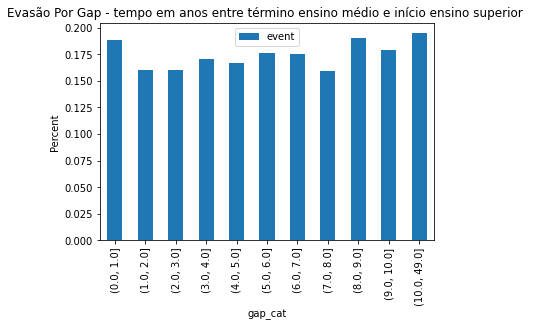

In [100]:
col = 'gap_cat'
df[col] = pd.cut(df.gap, bins=[0,1,2,3,4,5,6,7,8,9,10, df.gap.max()])

ax = df.groupby(col).agg({'event':'mean'}).plot.bar()
ax.set(ylabel="Percent")
ax.set(title='Evasão Por Gap - tempo em anos entre término ensino médio e início ensino superior ')
plt.show()